# Economic Growth

## Data Exploration Problem, 150pts

The GDP (gross domestic product) growth rate measures how fast the economy is growing. Four components drive it: personal consumption, business investment, government spending and net trade. It is measured quarterly, and is the most important economic health indicator. 

As a data scientist, you have to analyze data from the World Bank and create a model that can project GDP growth for Mexico and the top 10 countries in 2030. 

### OBJECTIVE: 
> Create a GDP growth model for Mexico and the top 10 countries and project for 2030. 
### FEATURES:
> Pandas has an API to access World Bank data directly using pandas-datareader. It can be found here: [http://pandas-datareader.readthedocs.io/en/latest/remote_data.html#indicators](http://pandas-datareader.readthedocs.io/en/latest/remote_data.html#indicators)

>The World Bank has a web interface to view the data: 
http://databank.worldbank.org/data/reports.aspx?source=world-development-indicators

>As for the source, we recommend using: 
- GDP growth (annual %)(NY.GDP.MKTP.KD.ZG)
- GDP per capita growth (annual %)(NY.GDP.PCAP.KD.ZG)

>Google has an interesting tool to create simple graphs that feeds from the World Bank data: https://www.google.com/publicdata/explore?ds=d5bncppjof8f9

### Deliberables
> - Presentation(150pts) You will present your findings to a group of judges. They will evaluate your results in terms of originality, model fitness with data, technique used to find the model, and quality of the presentation. To present your results, you will have 5 minutes. 	


In [49]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas_datareader import wb


In [114]:
gdp_growth = 'NY.GDP.MKTP.KD.ZG'
gdp_per_c_growth = 'NY.GDP.PCAP.KD.ZG'
countries = ['US', 'CA', 'MX','FR']
dat_gdp = wb.download(indicator=gdp_growth, country=countries, start=1990, end=2017)
dat_gdppc = wb.download(indicator=gdp_growth, country=countries, start=1990, end=2017)
gdp = pd.read_csv('WBData.csv')
gdp



,Country Name,Country Code,Series Name,Series Code,2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017]
0,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,2398645598.19413,2935659299.72684,3255789080.96008,3543256805.92147,4016972351.49192,4007353156.58415,3660530702.97305,3355695364.23841,3442062830.13622,3164615186.94591,3281585236.32501,3350736367.25488,2811489408.89431,2877311946.90265,3012914131.16971
1,Andorra,AND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,12.1687198869046,7.64786979021986,7.39698271536501,4.53635311915991,0.0400110668908411,-8.59000378676674,-3.69065350958851,-5.35882577533336,-4.64654305163337,-1.61521818298665,0.351645001850741,2.27768315306425,0.842203518374134,1.8891243866394,1.87319661596112
2,Andorra,AND,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,7.3666565461149,3.32467350857601,3.82511760495885,1.79487302846965,-2.00717757799602,-9.87404494462545,-4.37595479585616,-5.344256801575,-3.85184552026108,-0.0397440046016158,2.39251434801653,4.29811376203568,2.40497717507311,2.85552917145593,2.29146375207033
3,Antigua and Barbuda,ATG,GDP (current US$),NY.GDP.MKTP.CD,855643111.111111,919577148.148148,1022191296.2963,1157005444.44444,1311401333.33333,1368431037.03704,1224253000,1152469074.07407,1142042925.92593,1211411703.7037,1192925407.40741,1280133333.33333,1364863037.03704,1460144703.7037,1532397555.55556
4,Antigua and Barbuda,ATG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.05790854956044,5.736460188482,6.41240516399535,12.728507447159,9.25942055972271,-0.03013326815055,-12.1075361856213,-7.20002446135504,-2.07912704683282,3.50660922205834,-0.103939140635774,5.10194036354055,4.06021896269833,5.34247943486722,3.33704921545255
5,Antigua and Barbuda,ATG,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,4.81013986157402,4.58153822623882,5.22491840676207,11.4202220925713,7.96812177546231,-1.21600389473025,-13.1434877953205,-8.25879178455823,-3.16146476018599,2.37503878117944,-1.173116190437,3.98475058531469,2.9688274965403,4.25736727880744,2.2744235966331
6,Argentina,ARG,GDP (current US$),NY.GDP.MKTP.CD,127586973492.177,164657930452.787,198737095012.282,232557260817.308,287530508430.568,361558037110.419,332976484577.619,423627422092.49,530163281574.658,545982375701.128,552025140252.246,526319673731.638,594749285413.212,554860945013.62,637590419269.324
7,Argentina,ARG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,8.83704079576924,9.02957330068155,8.85165992013435,8.04715150043027,9.00765087504757,4.05723310346406,-5.91852507634947,10.1253981561002,6.00395169280579,-1.02642045443208,2.40532378079436,-2.51261532081396,2.73115982828946,-1.82254217028903,2.86392289725737
8,Argentina,ARG,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,7.64379418460412,7.84910614558494,7.69268851986895,6.91802708554957,7.88585198132516,2.99516742225612,-6.88014857518392,8.99143795986308,4.90212524432248,-2.0605746367528,1.33845293358164,-3.51419598172089,1.69894482424465,-2.78459211069379,1.87966121607326
9,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,2021301675.97765,2228279329.60894,2331005586.59218,2421474860.3352,2623726256.98324,2791960893.85475,2498932960.89385,2467703910.61453,2584463687.15084,..,..,..,..,..,..


In [121]:
for d in gdp.columns[4:]:
    sorted_country = gdp.sort_values(by = [d], ascending = False)
    print(d)
    print(sorted_country['Country Name'][0:10], sorted_country[d][0:10].mean)
    print("-----")

2003 [YR2003]
60            Czech Republic
267                   Belize
66                   Estonia
192                Singapore
549    Sao Tome and Principe
315                 Colombia
414                  Jamaica
204                    Spain
426                 Kiribati
457               Madagascar
Name: Country Name, dtype: object <bound method Series.mean of 60     99627140274.3805
267           990374050
66     9833870709.12376
192    97001377568.5914
549    95544010.7819098
315     94684584162.773
414     9399447609.1835
204    906853273137.698
426    90231856.8000519
457     9.7848921313329
Name: 2003 [YR2003], dtype: object>
-----
2004 [YR2004]
48                    Chile
522                Pakistan
297              Cabo Verde
3       Antigua and Barbuda
294                 Burundi
534             Philippines
18             Bahamas, The
613                  Turkey
421              Kazakhstan
226    United Arab Emirates
Name: Country Name, dtype: object <bound method Series.me

In [162]:
sum = 0
for num in range(1,16):
    print(gdp.loc[0][3:][num])
    sum += float(gdp.loc[0][3:][num])
    print(num)
print(sum/15)

2398645598.19413
1
2935659299.72684
2
3255789080.96008
3
3543256805.92147
4
4016972351.49192
5
4007353156.58415
6
3660530702.97305
7
3355695364.23841
8
3442062830.13622
9
3164615186.94591
10
3281585236.32501
11
3350736367.25488
12
2811489408.89431
13
2877311946.90265
14
3012914131.16971
15
3274307831.1812496


In [191]:
def returnMean(index):
    suma = 0
    tot = 15
    for num in range(1,16):
        if gdp.loc[index][3:][num] != '..':
            suma += float(gdp.loc[index][3:][num])
        else:
            suma += 0
            tot -= 1
    if tot == 0:
        tot = 1
    return(suma/tot, gdp.loc[index][0])

In [221]:
averageGDP = {}
for t in range(0,len(gdp),3):
    averageGDP[returnMean(t)[1]] = returnMean(t)[0]
paises = []
gdps = []
arreglado = sorted(averageGDP.items(), key=lambda kv: kv[1])[-12:-2]


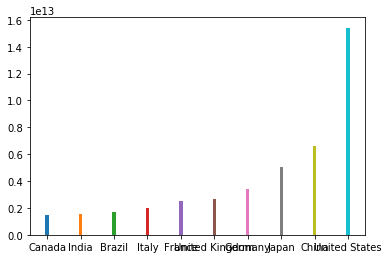

In [234]:
fig, ax = plt.subplots()
for t in (arreglado): 
    rects1 = ax.bar(t[0], t[1],.1,label='Country')
plt.show()